In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras 

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images.max()

255

In [6]:
train_labels[:124]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
       9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2,
       0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7,
       9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8, 8, 0, 1, 1, 6, 8, 1, 9, 7, 8,
       8, 9, 6, 6, 3, 1, 5, 4, 6, 7, 5, 5, 9, 2], dtype=uint8)

In [7]:
class_labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

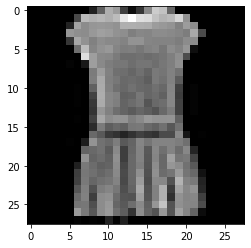

In [14]:
plt.imshow(train_images[3],cmap="gray")

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dense(10, activation='softmax') 
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=100,batch_size=100)

Epoch 1/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.0785 - accuracy: 0.9704
Epoch 2/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.0673 - accuracy: 0.9743
Epoch 3/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.0749 - accuracy: 0.9715
Epoch 4/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.0706 - accuracy: 0.9732
Epoch 5/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.0673 - accuracy: 0.9739
Epoch 6/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.0641 - accuracy: 0.9749
Epoch 7/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.0658 - accuracy: 0.9756
Epoch 8/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.0648 - accuracy: 0.9747
Epoch 9/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.0652 - accuracy: 0.9755
Epoch 10/100
60000/60000 [================

In [20]:
eva=model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 162us/step


In [21]:
loss=eva[0]
accu=eva[1]

accu*100

89.02999758720398

In [22]:
predict=model.predict(test_images)

In [27]:
class_labels[predict[354].argmax()]

'Shirt'

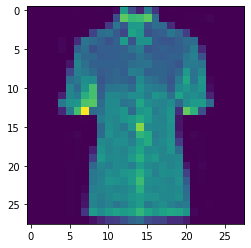

In [26]:
plt.imshow(test_images[354])

In [25]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
